In [2]:
#Load libraries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import numpy as np
#from sklearn.decomposition import PCA
#import sspa
#from sklearn.preprocessing import StandardScaler
#import scipy 
#import networkx as nx


In [3]:
#Read in file to check
df = pd.read_csv("Data/Su_integrated_data.csv", index_col=0)

### Data exploration

In [4]:
print("Number of compounds:", len(df. columns[:-2]) )
print("Number of samples:", len(df. index))

print(df['WHO_status'].value_counts()) 
print(df['Group'].value_counts())

#return non-integer columns
df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64']

Number of compounds: 787
Number of samples: 128
3-4    56
1-2    45
5-7    27
Name: WHO_status, dtype: int64
COVID19     128
Name: Group, dtype: int64


WHO_status    object
Group         object
dtype: object

In [5]:
#Check data is standardised 

df_num  = df.iloc[:,:-2] #all rows, all columns apart from last two
print(df_num.max().max())
print(df_num.min().min())
print(df_num.mean(axis = 0)) #mean of 0
print(df_num.std(axis = 0)) #sd of 1


10.947848832735254
-7.68875111551009
1372     -6.938894e-18
16610    -4.163336e-17
72665     4.163336e-17
27823     0.000000e+00
30915    -4.163336e-17
              ...     
Q9Y4K4   -5.551115e-17
Q9Y5A7    4.163336e-17
Q9Y5L3   -6.938894e-18
Q9Y5V3   -3.469447e-17
Q9Y653    7.979728e-17
Length: 787, dtype: float64
1372      1.003929
16610     1.003929
72665     1.003929
27823     1.003929
30915     1.003929
            ...   
Q9Y4K4    1.003929
Q9Y5A7    1.003929
Q9Y5L3    1.003929
Q9Y5V3    1.003929
Q9Y653    1.003929
Length: 787, dtype: float64


In [21]:
df_hist

array([ 1.93652564e-02,  3.98610310e-01,  1.08141211e-01, -7.28354575e-02,
        2.38715838e-01,  3.41888904e-01,  4.99199301e-01,  2.64577869e-01,
        5.58715933e-01,  1.65769607e-02,  2.02231946e-01, -4.29411526e-02,
        4.95759447e-01,  3.07111239e-01, -1.89525412e-01, -1.89432149e-01,
        1.99486439e-01,  1.59705013e-01,  3.59641927e-01,  2.65855880e-01,
       -5.95384519e-02,  2.76695624e-01,  5.23706429e-01, -1.47175843e-01,
        5.64500153e-01,  3.71204068e-01,  1.50720412e-01,  4.00601335e-01,
        2.15058411e-01, -1.43704171e-01, -3.45911837e-01,  1.63025245e-01,
       -9.32958368e-02,  4.61531063e-01,  2.00351259e-01, -1.00658303e-01,
        5.85679150e-03,  2.72050524e-01,  3.24442023e-01,  5.58710081e-01,
       -2.07590369e-02,  2.42636398e-01,  3.53125634e-01,  3.02434112e-01,
        2.93344446e-01,  5.25525337e-02,  2.18243295e-01, -1.11867958e-01,
        3.21353211e-01, -4.05701450e-01, -1.35918631e-01,  6.34518602e-01,
        7.36680018e-01,  

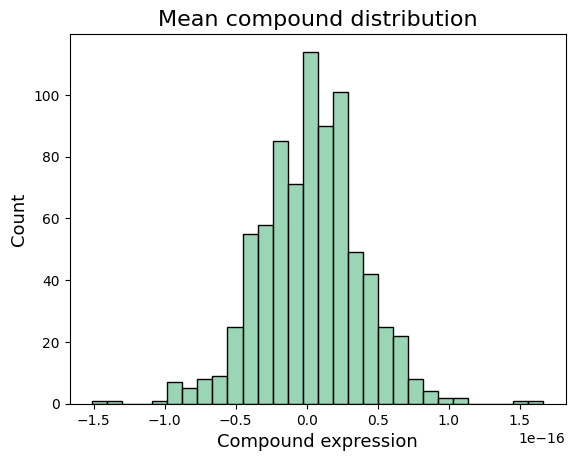

In [6]:
df_hist = df_num.mean(axis = 0) #axis = 0 by column
sns.histplot(df_hist, bins = 30,color='#79C99E',edgecolor="k") 

#The mean value for each compound has been plotted
plt.title('Mean compound distribution',fontsize=16)
plt.xlabel('Compound expression',fontsize=13)
plt.ylabel('Count',fontsize=13) ;

#plt.savefig( 'Figures/mean_multiomic_distribution.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

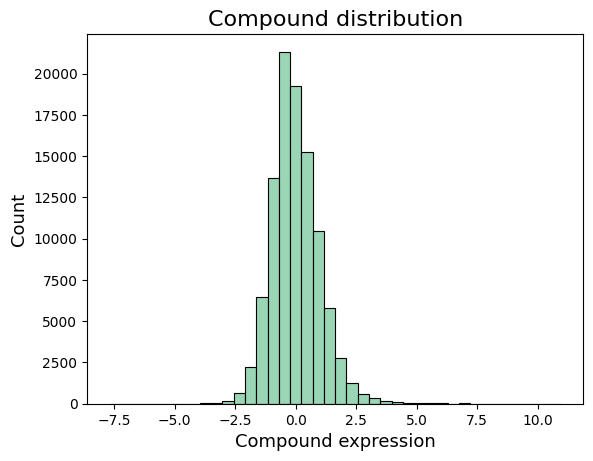

In [7]:
df_num = df_num.to_numpy()

df_hist = df_num.flatten()
sns.histplot(df_hist, bins = 40,color='#79C99E',edgecolor="k") 

plt.title('Compound distribution',fontsize=16)
plt.xlabel('Compound expression',fontsize=13)
plt.ylabel('Count',fontsize=13) ;

#plt.savefig( 'Figures/multiomic_distribution.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

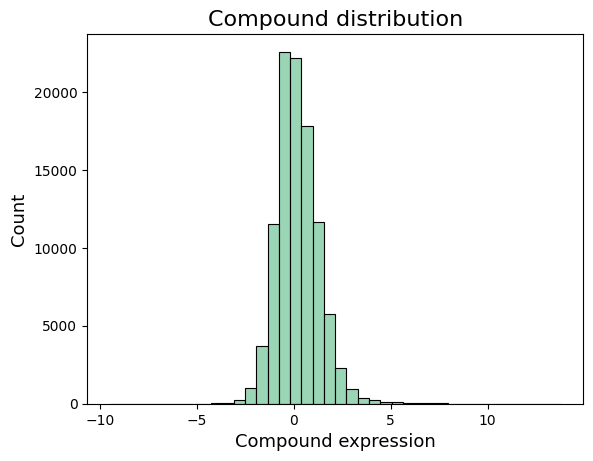

In [ ]:
df_num = df_num.to_numpy()

df_hist = df_num.flatten()
sns.histplot(df_hist, bins = 40,color='#79C99E',edgecolor="k") 

plt.title('Compound distribution',fontsize=16)
plt.xlabel('Compound expression',fontsize=13)
plt.ylabel('Count',fontsize=13) ;

#plt.savefig( 'Figures/multiomic_distribution.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')